In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter


In [2]:
df = pd.read_csv('transformed_df.csv')
display(df.head())

,Question,Number of Sources,Trust Score,chatGPT,copilot,gemini,llama,perplexity,Economics & Commerce,Entertainment,...,y20india.in,yahoo.com,yale.edu,yaleclimateconnections.org,yellowbrick.co,yourdictionary.com,yourstory.com,youtube.com,zavvi.com,zerohanger.com
0,"""where does the saying keeping up with the jon...",2,10,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""when did day light savings start in the us""",1,9,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"""what is the doll in the garden about""",3,11,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"""where is a unitary system of government found""",3,11,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"""who dies in season 2 of the originals""",1,9,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Preparing our Data for Clustering Analysis



In [3]:
df.drop('Question', axis=1, inplace=True)
display(df.head())
df.shape

,Number of Sources,Trust Score,chatGPT,copilot,gemini,llama,perplexity,Economics & Commerce,Entertainment,Food & Cooking,...,y20india.in,yahoo.com,yale.edu,yaleclimateconnections.org,yellowbrick.co,yourdictionary.com,yourstory.com,youtube.com,zavvi.com,zerohanger.com
0,2,10,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,11,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,11,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,9,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


(500, 969)

#### Due to the vast number of features (primarily due to the urls in our dataset's attributed sources), we chose to do some feature selection using `Sci-kit Learn`'s `VarianceThreshold` method.  This will remove the features with low-variance and significantly reduce our dataset dimensionality (from 1083 feature columns to just 38).

In [4]:
threshold = 0.01
selector = VarianceThreshold(threshold)

df_reduced = selector.fit_transform(df)

print('Number of features before reduction: ', df.shape[1])

selected_features = df.columns[selector.get_support()]

df_reduced = pd.DataFrame(df_reduced, columns=selected_features)

df_reduced.head()

print('Number of features after reduction: ', df_reduced.shape[1])

Number of features before reduction:  969
Number of features after reduction:  60


#### After applying `VarianceThreshold` we reduced our dataset's feature columns from 969 to only 60 (~93.8% reduction in feature columns), while still retaining high variance in our dataset.

#### Next, we standardize our data to ensure that all of features are on the same scale.

In [5]:
scaler = StandardScaler()
df_reduced_scaled = scaler.fit_transform(df_reduced)
df_reduced_scaled = pd.DataFrame(df_reduced_scaled, columns=selected_features)

display(df_reduced_scaled.head())

,Number of Sources,Trust Score,chatGPT,copilot,gemini,llama,perplexity,Economics & Commerce,Entertainment,Food & Cooking,...,themoviedb.org,thoughtco.com,tvguide.com,usatoday.com,verywellhealth.com,webmd.com,wikipedia.org,wikiwand.com,yahoo.com,youtube.com
0,-0.507689,-0.026016,-0.5,-0.5,2.0,-0.5,-0.5,-0.274352,-0.577350,-0.175863,...,-0.110208,-0.169725,-0.110208,-0.110208,-0.110208,-0.119159,-0.988071,-0.119159,-0.110208,-0.294884
1,-0.763580,-0.184652,-0.5,-0.5,2.0,-0.5,-0.5,-0.274352,-0.577350,-0.175863,...,-0.110208,-0.169725,-0.110208,-0.110208,-0.110208,-0.119159,1.012073,-0.119159,-0.110208,-0.294884
2,-0.251797,0.132620,-0.5,-0.5,2.0,-0.5,-0.5,-0.274352,1.732051,-0.175863,...,-0.110208,-0.169725,-0.110208,-0.110208,-0.110208,-0.119159,-0.988071,-0.119159,-0.110208,-0.294884
3,-0.251797,0.132620,-0.5,-0.5,2.0,-0.5,-0.5,-0.274352,-0.577350,-0.175863,...,-0.110208,-0.169725,-0.110208,-0.110208,-0.110208,-0.119159,1.012073,-0.119159,-0.110208,-0.294884
4,-0.763580,-0.184652,-0.5,-0.5,2.0,-0.5,-0.5,-0.274352,1.732051,-0.175863,...,-0.110208,-0.169725,-0.110208,-0.110208,-0.110208,-0.119159,1.012073,-0.119159,-0.110208,-0.294884


#### We want to ensure there are no data issues with our remaining feature columns, so we list the feature column names.  We observed one that stood out as an error (likely a result from a data transformation issue in the EDA phase) - feature column 'Unnamed: 24'.  We remove this from our dataset as it will have meaningful contribution to our future analysis/model development.

In [6]:
print(df_reduced_scaled.columns)

Index(['Number of Sources', 'Trust Score', 'chatGPT', 'copilot', 'gemini',
       'llama', 'perplexity', 'Economics & Commerce', 'Entertainment',
       'Food & Cooking', 'General Knowledge', 'Geography', 'History',
       'Literature', 'Philosophy', 'Politics', 'Science & Technology',
       'Sports', 'Are All Source Links Functional_all_links_functional',
       'Are All Source Links Functional_some_links_functional',
       'Multi-modal Response_multi-modal', 'Multi-modal Response_text_only',
       'Unnamed: 24', 'amazon.com', 'bbc.com', 'behindthevoiceactors.com',
       'britannica.com', 'byjus.com', 'clevelandclinic.org', 'ew.com',
       'fandom.com', 'healthline.com', 'history.com', 'imdb.com', 'kenhub.com',
       'libretexts.org', 'nasa.gov', 'nationalgeographic.com', 'nih.gov',
       'people.com', 'reddit.com', 'rottentomatoes.com', 'sciencedirect.com',
       'screenrant.com', 'si.com', 'space.com', 'sportskeeda.com',
       'stanford.edu', 'state.gov', 'study.com', 'them

In [7]:
df_reduced_scaled.drop(columns='Unnamed: 24', inplace=True)

## Determining the Optimal Number of Clusters

#### In order to determine the best number of clusters to use in our K-Means clustering algorithm, we chose to experiment with two different clustering evaluation approaches: 
 - #### Elbow Method - to visualize the number of clusters vs inertia
 - #### Silhouette Score - to act as a secondary check and provide more granular values

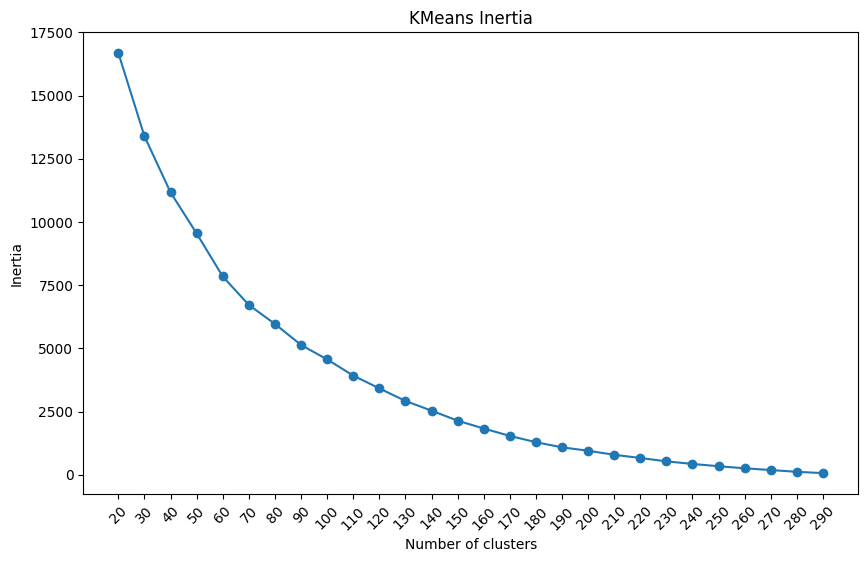

In [8]:
inertia = []
range_clusters = range(20, 300, 10)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_reduced_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('KMeans Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range_clusters, rotation=45)
plt.show()

#### As can be seen in the elbow plot above and  # of clusters/silhouette scores below, the number of clusters with the best performance are >100 clusters.  This is not ideal for visualizing clusters on a plot as it will make understanding any distinguishable characteristics practically impossible.

In [9]:
for k in range(5, 300, 5):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_reduced_scaled)
    score = silhouette_score(df_reduced_scaled, kmeans.labels_)
    print(f'Number of clusters: {k}, silhouette score: {score}')

Number of clusters: 5, silhouette score: 0.013510811992142387
Number of clusters: 10, silhouette score: 0.04536994445135121
Number of clusters: 15, silhouette score: 0.098989685951972
Number of clusters: 20, silhouette score: 0.11981336512280989
Number of clusters: 25, silhouette score: 0.14684275441677902
Number of clusters: 30, silhouette score: 0.15872043387145443
Number of clusters: 35, silhouette score: 0.16896842636981943
Number of clusters: 40, silhouette score: 0.17692302246200808
Number of clusters: 45, silhouette score: 0.19228676769380612
Number of clusters: 50, silhouette score: 0.21149084932893156
Number of clusters: 55, silhouette score: 0.24878418113192693
Number of clusters: 60, silhouette score: 0.2614155335226839
Number of clusters: 65, silhouette score: 0.2647575937871139
Number of clusters: 70, silhouette score: 0.3167756985594425
Number of clusters: 75, silhouette score: 0.3206768153378764
Number of clusters: 80, silhouette score: 0.32697585442808125
Number of clus

#### Given the silhouette scores of the various number of clusters, we decided to use 60 clusters for exploration moving forward.  This cluster number is the lowest # of clusters that still has a silouhette score > .25, which is considered to be the 'weak' silouhette value.[1]

#### [1]: **[Silouhette (clustering)](https://en.wikipedia.org/wiki/Silhouette_(clustering))** 


In [10]:
kmeans = KMeans(n_clusters=60, random_state=42).fit(df_reduced_scaled)

In [11]:
cluster_sizes = Counter(kmeans.labels_)
print("Cluster Sizes: ", cluster_sizes) 

Cluster Sizes:  Counter({41: 43, 22: 40, 26: 25, 21: 25, 11: 24, 42: 21, 7: 20, 4: 18, 3: 18, 24: 16, 54: 15, 53: 15, 15: 14, 0: 14, 5: 13, 47: 11, 38: 11, 2: 8, 52: 7, 43: 6, 34: 6, 14: 6, 27: 6, 55: 6, 25: 6, 36: 5, 49: 5, 19: 5, 8: 5, 16: 5, 13: 5, 1: 4, 39: 4, 10: 4, 33: 4, 31: 4, 28: 4, 37: 4, 56: 4, 48: 4, 30: 3, 40: 3, 32: 3, 12: 3, 59: 3, 46: 3, 18: 3, 58: 2, 29: 2, 45: 2, 20: 2, 6: 2, 51: 2, 35: 1, 17: 1, 57: 1, 23: 1, 50: 1, 9: 1, 44: 1})


In [12]:
df_reduced['Cluster'] = kmeans.labels_
display(df_reduced)

,Number of Sources,Trust Score,chatGPT,copilot,gemini,llama,perplexity,Economics & Commerce,Entertainment,Food & Cooking,...,thoughtco.com,tvguide.com,usatoday.com,verywellhealth.com,webmd.com,wikipedia.org,wikiwand.com,yahoo.com,youtube.com,Cluster
0,2,10,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,1,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,22
2,3,11,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,3,11,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,24
4,1,9,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10,17,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,46
496,9,16,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,44
497,11,18,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
498,6,14,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,55


In [13]:
cluster_summary = df_reduced.groupby('Cluster').mean()
cluster_summary.head()

,Number of Sources,Trust Score,chatGPT,copilot,gemini,llama,perplexity,Economics & Commerce,Entertainment,Food & Cooking,...,themoviedb.org,thoughtco.com,tvguide.com,usatoday.com,verywellhealth.com,webmd.com,wikipedia.org,wikiwand.com,yahoo.com,youtube.com
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.857143,7.928571,0.142857,0.357143,0.142857,0.357143,0.000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.428571,0.0,0.0,0.000
1,7.250000,15.750000,0.250000,0.000000,0.250000,0.000000,0.500,0.0,1.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000
2,6.750000,15.500000,0.000000,0.000000,0.375000,0.000000,0.625,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.125
3,0.777778,7.666667,0.000000,1.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,...,0.0,0.055556,0.0,0.0,0.0,0.0,0.222222,0.0,0.0,0.000
4,0.055556,1.388889,0.000000,0.000000,0.055556,0.944444,0.000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000


#### Before we plot our clusters, we apply PCA to further account for possible correlation between the features...

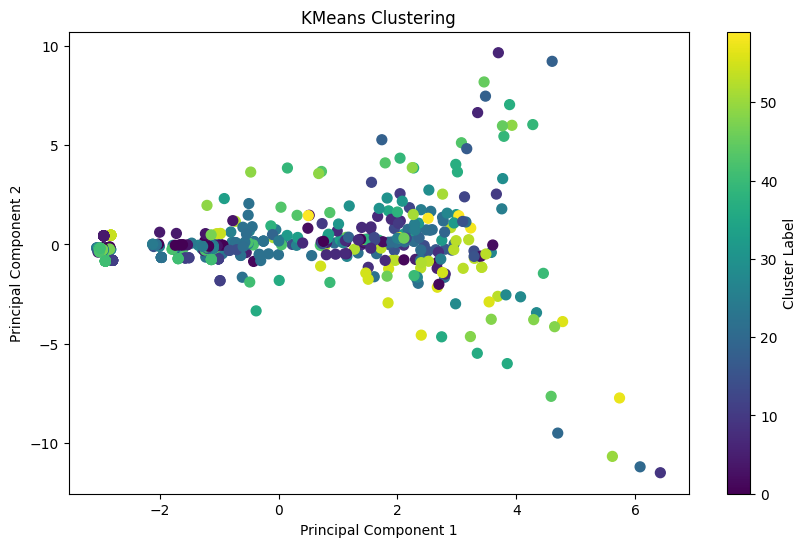

In [14]:
pca = PCA(n_components=59)
df_reduced_pca = pca.fit_transform(df_reduced_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_reduced_pca[:, 0], df_reduced_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster Label')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.show()

In [15]:
explained_variance = pca.explained_variance_ratio_ 
cumulative_variance = explained_variance.cumsum()  

for i, (variance, cumulative) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"Principal Component {i+1}: {variance:.2f}% of variance ({cumulative:.2f}% cumulative)")


Principal Component 1: 0.09% of variance (0.09% cumulative)
Principal Component 2: 0.06% of variance (0.16% cumulative)
Principal Component 3: 0.06% of variance (0.21% cumulative)
Principal Component 4: 0.05% of variance (0.26% cumulative)
Principal Component 5: 0.03% of variance (0.30% cumulative)
Principal Component 6: 0.03% of variance (0.33% cumulative)
Principal Component 7: 0.03% of variance (0.36% cumulative)
Principal Component 8: 0.03% of variance (0.39% cumulative)
Principal Component 9: 0.03% of variance (0.41% cumulative)
Principal Component 10: 0.03% of variance (0.44% cumulative)
Principal Component 11: 0.02% of variance (0.46% cumulative)
Principal Component 12: 0.02% of variance (0.48% cumulative)
Principal Component 13: 0.02% of variance (0.51% cumulative)
Principal Component 14: 0.02% of variance (0.53% cumulative)
Principal Component 15: 0.02% of variance (0.55% cumulative)
Principal Component 16: 0.02% of variance (0.57% cumulative)
Principal Component 17: 0.02% of 

#### The above output was interesting.  It takes 39 of the 59 total components to acheive 90% variance in our dataset.  A key explanation could be the `VarianceThreshold` we applied before conducting PCA, though these results indicate that there is still likely overlapping feature data.  Because of the high dimesionality of the dataset, we wanted to see if a t-SNE plot may capture better clusters...

## Applying t-SNE as an alternative to PCA:


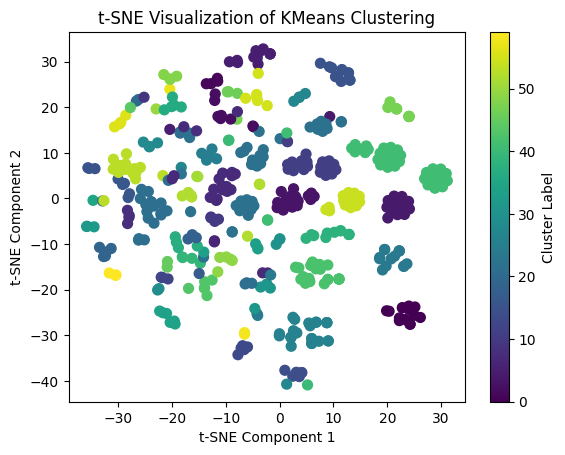

In [16]:
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(df_reduced_scaled)

plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title('t-SNE Visualization of KMeans Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


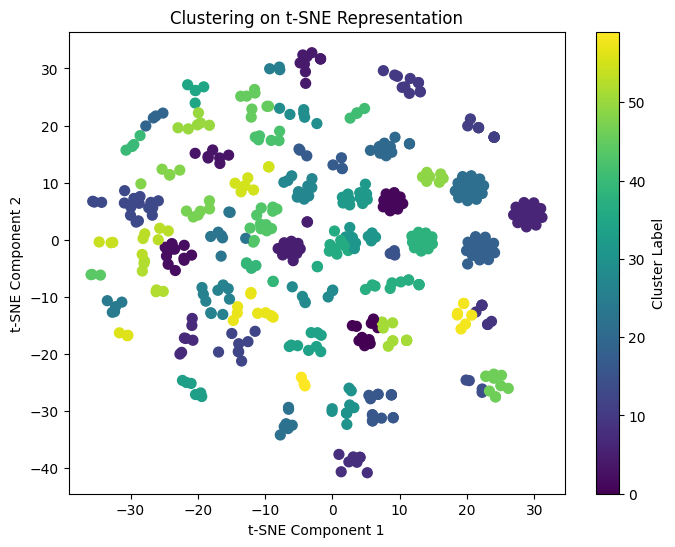

In [17]:
kmeans_tsne = KMeans(n_clusters=60, random_state=43) 
tsne_cluster_labels = kmeans_tsne.fit_predict(tsne_data)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=tsne_cluster_labels, cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster Label')
plt.title('Clustering on t-SNE Representation')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [18]:
silhouette_tsne = silhouette_score(tsne_data, tsne_cluster_labels)
print(f'Silhouette Score: {silhouette_tsne}')


Silhouette Score: 0.5295027494430542


In [19]:
df_reduced_scaled_tsne = df_reduced_scaled.copy()
df_reduced_scaled_tsne['Cluster'] = kmeans_tsne.labels_

df_tsne_grouped = df_reduced_scaled_tsne.groupby('Cluster')

cluster_summary_tsne = df_tsne_grouped.mean()
display(cluster_summary_tsne)

,Number of Sources,Trust Score,chatGPT,copilot,gemini,llama,perplexity,Economics & Commerce,Entertainment,Food & Cooking,...,themoviedb.org,thoughtco.com,tvguide.com,usatoday.com,verywellhealth.com,webmd.com,wikipedia.org,wikiwand.com,yahoo.com,youtube.com
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.251797,0.148483,0.000000,0.250000,0.750000,-0.500000,-0.500000,3.644957,-0.577350,-0.175863,...,-0.110208,-0.169725,-0.110208,-0.110208,-0.110208,-0.119159,0.012001,-0.119159,-0.110208,-0.294884
1,-1.019471,-1.453741,-0.500000,2.000000,-0.500000,-0.500000,-0.500000,-0.274352,1.732051,-0.175863,...,-0.110208,-0.169725,-0.110208,-0.110208,-0.110208,-0.119159,-0.988071,-0.119159,-0.110208,-0.294884
2,0.430580,0.529210,-0.500000,-0.500000,-0.500000,-0.500000,2.000000,-0.274352,-0.577350,-0.175863,...,-0.110208,-0.169725,-0.110208,-0.110208,-0.110208,-0.119159,0.512037,-0.119159,-0.110208,-0.294884
3,0.552433,0.767164,-0.142857,-0.500000,0.571429,-0.500000,0.571429,0.285550,1.072222,0.661580,...,-0.110208,-0.169725,-0.110208,-0.110208,-0.110208,-0.119159,0.726338,-0.119159,-0.110208,0.231695
4,-0.328565,-0.375016,0.000000,0.250000,0.000000,0.250000,-0.500000,-0.274352,-0.577350,5.686241,...,-0.110208,-0.169725,-0.110208,-0.110208,-0.110208,-0.119159,-0.388028,-0.119159,-0.110208,-0.294884
5,-0.074642,0.230242,-0.307692,-0.500000,1.807692,-0.500000,-0.500000,-0.274352,-0.577350,-0.175863,...,-0.110208,-0.169725,-0.110208,-0.110208,-0.110208,-0.119159,0.704358,-0.119159,-0.110208,-0.294884
6,-1.019471,-1.453741,-0.500000,-0.500000,-0.500000,2.000000,-0.500000,-0.274352,-0.577350,-0.175863,...,-0.110208,-0.169725,-0.110208,-0.110208,-0.110208,-0.119159,-0.988071,-0.119159,-0.110208,-0.294884
7,1.100772,0.948462,0.928571,-0.500000,-0.142857,-0.500000,0.214286,-0.274352,-0.577350,-0.175863,...,-0.110208,1.562163,-0.110208,-0.110208,1.201789,-0.119159,0.726338,-0.119159,-0.110208,-0.294884
8,0.355945,0.628357,-0.187500,-0.187500,-0.187500,0.125000,0.437500,-0.274352,-0.577350,-0.175863,...,-0.110208,-0.169725,-0.110208,1.037790,-0.110208,-0.119159,1.012073,-0.119159,1.037790,0.626628


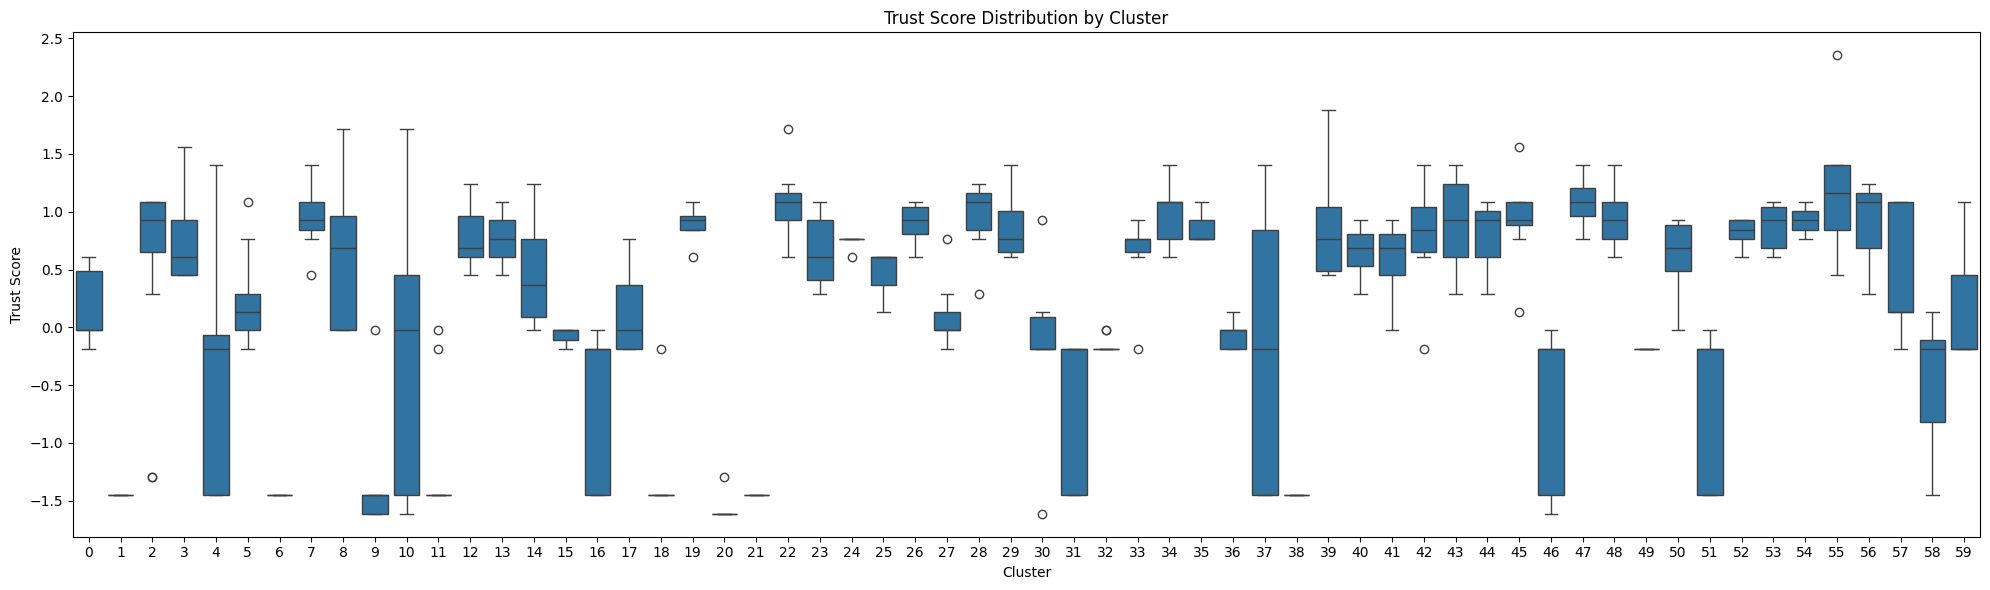

In [20]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Cluster', y='Trust Score', data=df_reduced_scaled_tsne)
plt.title('Trust Score Distribution by Cluster')
plt.tight_layout()
plt.show()

#### K-Means with t-SNE provided much more useful insights for future investigation.  For example, from the boxplot above, we see some clusters (such as 4, 16, 31, 37, 46, and 51) have low trust scores on average, whereas other clusters (such as 2, 40-45, and 56) have higher trust scores on average.  Another potential insight from this boxplot is outliers - we see several clusters, such as 2, 22, 45, etc. have outliers present in their clusters, which warrants further investigation as to why these outliers exist.

## Next Steps for Clustering:


#### We were surprised to see little to no useful findings in our clustering model based on our initial clustering development.  That being said, there are several things that we think would be beneficial to explore as next steps for this type of model:

 - #### Increase the dataset size.
 - #### Explore different dimensionality reduction techniques to understand if some perform better than others in our case.
 - #### Explore Clustering with different datasets (i.e. testing Clustering with different feature columns being removed) to see if we identify any significant patterns in the data.